In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [261]:
def next_bin_mom_step(data_arr, p_arr=None, fraction=0.98):
    n_data = len(data_arr)
    norm_arr = np.array([fraction ** x for x in range(1, n_data + 1)])
    norm_z = np.sum(norm_arr)
    p_new = np.dot(norm_arr, data_arr) / norm_z
    rand_number = np.random.rand(1)[0]
    if rand_number < p_new:
        new_data = 1
    else:
        new_data =0
    new_data_arr = np.array([new_data] + list(data_arr))
    if p_arr is not None:
        assert len(p_arr) == len(data_arr)
        new_p_arr = np.array([p_new] + list(p_arr)) 
    else:
        new_p_arr = None
    return new_data_arr, new_p_arr

# def gen_bin_mom_data()

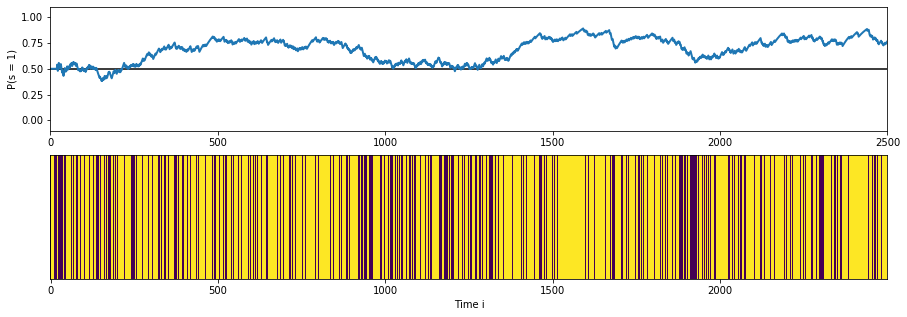

In [268]:
fig, ax = plt.subplots(2, 1, figsize=(15, 5))
n_start = 20
n_full = 2500
window_running_mean = 20

s_arr = np.random.randint(low=0, high=2, size=n_start)
p_arr = np.ones(n_start) * 0.5

for nn in range(n_start, n_full):
    s_arr, p_arr = next_bin_mom_step(data_arr=s_arr, p_arr=p_arr)
s_arr = s_arr[::-1]
p_arr = p_arr[::-1]

ax[0].plot([0, n_full], [0.5, 0.5], c='k')
# ax[0].plot(np.convolve(s_arr, np.ones(window_running_mean) / window_running_mean, mode='valid'), 
#     label=f'Running mean\n(size {window_running_mean})', linewidth=2)   
ax[0].plot(p_arr, linewidth=2)
ax[0].set_ylabel('P(s = 1)')
ax[0].set_ylim([-0.1, 1.1])
ax[0].margins(x=0)
ax[1].imshow(s_arr[:, None].T, aspect='auto')
ax[1].set_xlabel('Time i')
ax[1].set_yticks([]);